In [1]:
import os
from pathlib import Path
import pickle
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
def load_data(filename):
    with open(filename, 'rb') as file:
        return pickle.load(file)

In [3]:
data_root = r"C:/Users/hayashi/doutorado/mac6958--dados-redes/webrtc"


In [4]:
file_path = Path(data_root, 'data/processed/facial-1012-sequential.pkl')

In [5]:
data = load_data(file_path)

In [6]:
X,Y = data

In [7]:
X.shape, Y.shape

((34880, 30, 323), (34880, 5))

'user_id': -1.647508942095828,
'test_condition': 0.4629100498862757,
'delay': 1.0690449676496976,
'jitter': 1.224744871391589,
'packet_loss_rate': 0.0

In [8]:
Y[0]

array([-1.64750894,  0.46291005,  1.06904497,  1.22474487,  0.        ])

In [9]:
Y[0,2:]

array([1.06904497, 1.22474487, 0.        ])

In [10]:
Y_factor = Y[:,2:]

In [11]:
X.shape, Y_factor.shape

((34880, 30, 323), (34880, 3))

In [12]:
Y = Y_factor

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [14]:
# Split the data into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

In [20]:
for i in range(Y_train.shape[1]):
    print(i, np.unique(Y_train[:,i]))

0 [-1.60356745 -0.26726124  1.06904497]
1 [-0.81649658  1.22474487]
2 [-1.22474487  0.          1.22474487]


In [21]:
for i in range(Y_val.shape[1]):
    print(i, np.unique(Y_val[:,i]))

0 [-1.60356745 -0.26726124  1.06904497]
1 [-0.81649658  1.22474487]
2 [-1.22474487  0.          1.22474487]


In [29]:
# Build the model
model = Sequential([
    GRU(50, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.2),
    GRU(50, return_sequences=False),
    Dropout(0.2),
    Dense(3)  # Linear activation for regression
])

C:\Users\hayashi\doutorado\mac6958--dados-redes\webrtc\venv.2\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [30]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mse'])

In [31]:
# Summary of the model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_2 (GRU)                          │ (None, 30, 50)              │          56,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 30, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_3 (GRU)                          │ (None, 50)                  │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             153 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71,703 (280.09 KB)

 Trainable params: 71,703 (280.09 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(X_train, Y_train, epochs=500, batch_size=64, validation_data=(X_val, Y_val))

Epoch 1/500
436/436 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - loss: 1.0654 - mse: 1.0654 - val_loss: 1.0059 - val_mse: 1.0059
Epoch 2/500
436/436 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 1.0103 - mse: 1.0103 - val_loss: 1.0040 - val_mse: 1.0040
Epoch 3/500
436/436 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 1.0091 - mse: 1.0091 - val_loss: 1.0038 - val_mse: 1.0038
Epoch 4/500
436/436 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 1.0048 - mse: 1.0048 - val_loss: 1.0046 - val_mse: 1.0046
Epoch 5/500
436/436 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - loss: 1.0010 - mse: 1.0010 - val_loss: 1.0051 - val_mse: 1.0051
Epoch 6/500
436/436 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 1.0006 - mse: 1.0006 - val_loss: 1.0043 - val_mse: 1.0043
Epoch 7/500
436/436 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 1.0031 - mse: 1.0031 - val_loss: 1.0024 - val_mse: 1.0024
Epoch 8/500
436/436 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - loss: 1.0019 - mse: 1.0019 - val_loss: 1.0032 - val_mse: 1.0032
Epoch 9/500
436/436 ━━━━━━━━━━━━━━━━━━━━

In [26]:
# Evaluate the model on the validation set
val_loss, val_mse = model.evaluate(X_val, Y_val)
print(f"Validation Loss: {val_loss}")
print(f"Validation MSE: {val_mse}")

218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9988 - mse: 0.9988
Validation Loss: 1.0025575160980225
Validation MSE: 1.0025575160980225


In [27]:
import matplotlib.pyplot as plt

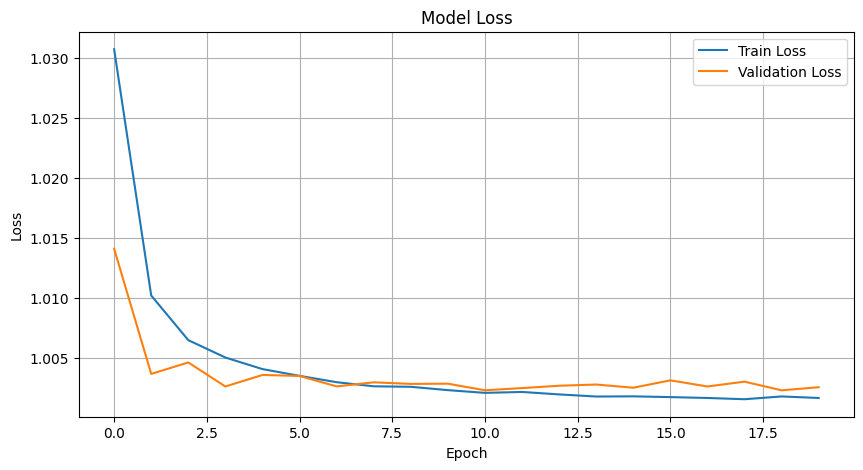

In [28]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()